# EDA and Modeling Notebook

This notebook is designed for AWS Amazon SageMaker Notebook instance type (ml.t2.xlarge).

## Import Necessary Modules

Depending on your environment you may need to install a few modules.

In [3]:
!pip install --upgrade pip

!pip install wordcloud

!pip install neattext

!pip install gensim

!pip install spacy

!pip install scikit-multilearn

!pip install imblearn

!pip install mglearn

!pip install pyLDAvis

     |████████████████████████████████| 12.8 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 56.8 MB/s eta 0:00:01
     |████████████████████████████████| 456 kB 53.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 52.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 53.3 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 100 kB 13.9 MB/s ta 0:00:01
     |████████████████████████████████| 82 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 113 kB 71.5 MB/s eta 0:00:01
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=7664 sha256=bca4187ff4f82f6a60e5009fca267b6b58f39e85144cea9d66f5d3e161bc57a3
  Stored in directory: /home/ec2-user/.cache/pip/wheels/41/11/53/911724983aa48deb94792432e14e518447212dd6c5477d49d3
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=1deaaca4671789

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


In [4]:
import boto3
import re
import string
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
get_ipython().magic('matplotlib inline')

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, multilabel_confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
# from imblearn.over_sampling import RandomOverSampler, SMOTE

import neattext as nt
import neattext.functions as nfx
import wordcloud
from wordcloud import WordCloud, STOPWORDS, tokenization

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer


pd.set_option("display.max_rows", 50, "display.max_columns", 50, "display.max_colwidth", -1)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:42: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Read in Data

If your file is stored in an AWS s3 bucket, this is how you read in your data file. Please take a look at the link to find out more about uploading and retrieving data from an s3 bucket. 

https://docs.aws.amazon.com/AmazonS3/latest/userguide/UsingBucket.html

In [4]:
#Gather data from s3 bucket
bucketname = 'YOUR BUCKET NAME HERE'
filename = 'script_EDA_file.csv'

s3 = boto3.resource('s3')
s3.Bucket(bucketname).download_file(filename, '../../script_EDA_file.csv')

In [4]:
df = pd.read_csv("../../script_EDA_file.csv")

In [5]:
#Drop first column
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
#View data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1141 non-null   object
 1   text       1141 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [7]:
df.head()

file_name  \
0  Beasts_of_No_Nation.txt               
1  Beauty_and_the_Beast.txt              
2  Beavis_and_Butt-head_Do_America.txt   
3  Beginners.txt                         
4  Being_Human.txt                       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Data Cleaning

For text data, data cleaning is a very important iterative step. I used regex along with other functions to remove unneccesary characters and digits from my text column.

In [8]:
#Function to clean 
def clean_text(text):
    #remove parenthesis and words within them
    text = re.sub("\(.*?\)", " ", text)
    # remove single letter characters
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    #remove punctuation marks
    text = re.sub("[%s]" % re.escape(string.punctuation), " ", text)
    #remove other unneccesary characters
    text = re.sub("[^\w\d' ]", " ", text)
    #remove digits
    text = re.sub('\w*\d\w*', " ", text)
    #remove capital words
    text = re.sub(r"(\b[A-Z]+\b)", " ", text)
    return text


df['text'] = df['text'].apply(clean_text)

In [9]:
#Split script column by words (tokenize)
df['text'] = df['text'].str.split()

In [10]:
#Create Movie title column using the text file names
df["movie_title"] = df["file_name"].apply(lambda x: x.split(".")[0].replace("_", " "))

In order to create my target columns (movie genres), I had to extract it from the bottom of each script. The following three cells is my process of pulling the text that contained the genre, putting it into a new column, and then separating them into list format (they were not previously separated). Depending on the format of your text file, you may not have to do these steps.

In [11]:
#Pull last couple of words from script to extract genre
df['Genres'] = df['text'].apply(lambda x: x[-40:])

In [12]:
# Separate Genre into a separate column

def pull_genre(column):
    newlst = []
    [newlst.append(column[i + 1]) for i, word in enumerate(column) if word == "Genres"]
    return newlst

df['genre'] = df['Genres'].apply(lambda x: pull_genre(x))
# df['Genres'].apply(lambda x: pull_genre(x))

#drop Genres column, it is no longer needed
df.drop(columns = ['Genres'], axis = 1, inplace = True)

df['genre'] = df['genre'].apply(lambda x: x[0])

In [13]:
#Split Genre into Lists
def split_genres(genres):
    return re.sub( r"([A-Z])", r" \1", genres).split()

df['genre'] = df['genre'].apply(lambda x: split_genres(str(x)))

In [14]:
def del_writers(text):
    for i, word in enumerate(text):
        if word == "Writers":
            del text[i:]
    return text
        
df['text'] = df['text'].apply(lambda x: del_writers(x))

### Removing Stop Words

In [15]:
#Utlizing stopwords from multiple libraries
spacy_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS)

gensim_stopwords = list(gensim.parsing.preprocessing.STOPWORDS)

wordcloud_stopwords = list(wordcloud.STOPWORDS)

neattext_stopwords = list(nt.STOPWORDS_en)

In [16]:
# setting stopwords and punctuations
import string, re

stop_words_list = stopwords.words('english')
stop_words_list += gensim_stopwords
stop_words_list += spacy_stopwords
stop_words_list += wordcloud_stopwords
stop_words_list += neattext_stopwords
stop_words_list += list(string.punctuation)
stop_words_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
                    'hand', 'written', 'com', '-', '–', '—', 'come', 'take', 'got', 'good', 'car']
stop_words_list += ["b", "look", "s", "nt", "like", "re", "door", "know", "away", "back", 'looks', 
                    "n't", 'takes', 'right', 'head', 'hand', 'theres', 'sees', 'let', 'lets', 'yes']
stop_words_list += ['turns', 'want', 'going', 'looking', 'takes', 'face', 'hands', 'll', 'room', 'try']
stop_words_list += ['hes', 'thats', 'man', 'time', 'think', 'way', 'cant', 'oh', 'little', 'walks', 
                    'open', 'yeah', 'pulls' ,'tell','sits' ,'starts' ,'comes' ,'na', 'eyes', 'something',
                    'goes', 'beat', 'people', 'long', 'stands', 'theres' 'sees', 'gets', 'phone', 'okay', 'mr', 
                    'window', 'moment', 'table', 'whats', 'suddenly' ,'gon','need', 'moves', 'opens', 'floor', 
                    'house' ,'hear', 'smiles', 'thing', 'stops', 'sure', 'inside', 'theyre', 'said', 'de', 
                    'la', 'le', 'watch', 'imsdb', 'user', 'comment', 'offscreen', 'www', 'fi']
stop_words_set = set(stop_words_list)

In [17]:
# Turn text column into strings for preprocessing purposes
df['text'] = df['text'].apply(lambda x: " ".join(x))

In [18]:
# Define function that removes stopwords and tokenizes text column
def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words_set]
    return stopwords_removed 

# applying the above function to our text column
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [19]:
df.head()

file_name  \
0  Beasts_of_No_Nation.txt               
1  Beauty_and_the_Beast.txt              
2  Beavis_and_Butt-head_Do_America.txt   
3  Beginners.txt                         
4  Being_Human.txt                       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text  \
0  [cary, joji, fukunaga, based, novel, uzodinma, iweala, dialogue, screenplay, faithful, form, novel, originally, lighter, form, nigerian, pidgin, english, known, krio, krio, lingua, franca, west, africa, gambia, cameroon, spoken, millions, accented, starting, angle, plastic, exterior, screen, television, children, running, circles, football, pitch, angle, boy, balancing, warm, smile, clever, littler, best, friend, ones, talent, agu, passes, line, lying, wheel, barrows, carrying, dike, kids, scouting, football, pitch, follow, suit, agu, dike, drop, stool, charming, agu, supposed, watching, massah, screen, imagination, agu, perform, framed, space, demolished, television, constable, unimpressed, garbage, agu, disappointed, discouraged, optimism, agu, white, helmeted, troops, humors, channels, agu, knob, swiftly, imagination, ...]                                                             
1  [stephen, chbosky, evan, spiliotopoulos, based, animated, film, beauty, beast, screenplay, linda, woolverton, august, resplendent, bespeaking, great, wealth, power, grounds, stonework, immaculate, hidden, heart, france, handsome, young, prince, lived, beautiful, castle, single, clinging, rose, bush, stormy, spring, night, plucks, rose, heart, desired, prince, selfish, unkind, groomed, servants, faces, paints, exotic, animal, mask, prince, feather, brush, drapes, prince, elaborately, bejeweled, coat, taxed, village, castle, beautiful, objects, dusts, wig, powder, poof, poof, holds, indicating, running, late, master, haughty, wave, prince, instructs, bring, light, oui, matre, lifted, preening, prince, ornate, parties, beautiful, ornate, filled, corners, world, display, prince, pleasure, circle, eligible, maidens, bow, heads, ...]                                                           
2  [beavis, butt, america, mike, judge, joe, stillman, location, href, location, href, mike, judge, joe, stillman, movie, begins, scenes, screaming, horror, running, streets, big, city, ground, shakes, giant, footsteps, pieces, building, debris, falling, getting, crushed, power, lines, coming, complete, pandemonium, japanese, animated, king, kong, godzilla, movie, footsteps, getting, closer, ground, shaking, intense, debris, falling, frame, smash, national, guard, truck, pan, white, socks, red, shorts, shirt, familiar, huh, huh, huh, huge, sound, butt, kong, continues, path, destruction, stomping, cars, buildings, saying, cool, huh, huh, huh, airplanes, tanks, start, firing, butt, irritated, says, cut, butt, munch, butt, swats, planes, sending, crashing, ground, stomps, ...]                                                                                                                    
3  [mike, mills, single, daisy, vase, kitchen, clicks, light, closet, rack, parents, clothes, begins, box, marked, home, box, marked, thrift, oliver, enters, bathroom, 

Due to the format of my raw data, I knew that all the words that were in all capital letters were either stage directions, character names, or location names. I removed capitalized words in order to clean the data, and get the text down to just the dialogue between characters in each script.

In [14]:
# Turn text column into strings for preprocessing purposes
# df['text'] = df['text'].apply(lambda x: " ".join(x))

In [26]:
#Save data to csv along the way
# df.to_csv("../../justincase_nocaps.csv", index = False)

### Multi-Label Binarizer

My target data involves several labels, so I implemented the multi-label binarizer from sklearn's preprocessing library to convert my genre column into columns and assign a "1" for movies with that particular genre and a "0" for all other movies.

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

# Binarize labels
mlb = MultiLabelBinarizer()
expandedGenreData = mlb.fit_transform(df['genre'])
labelClasses = mlb.classes_


# Create a pandas.DataFrame from our output
expandedGenres = pd.DataFrame(expandedGenreData, columns=labelClasses)

In [21]:
#concat dataframes back together
df_concat = pd.concat([df, expandedGenres], axis=1)

In [22]:
df_concat

file_name  \
0     Beasts_of_No_Nation.txt               
1     Beauty_and_the_Beast.txt              
2     Beavis_and_Butt-head_Do_America.txt   
3     Beginners.txt                         
4     Being_Human.txt                       
...               ...                       
1136  Battle_of_Shaker_Heights.txt          
1137  Battle:_Los_Angeles.txt               
1138  Bean.txt                              
1139  Beach.txt                             
1140  Beasts_of_the_Southern_Wild.txt       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 text  \
0     [cary, joji, fukunaga, based, novel, uzodinma, iweala, dialogue, screenplay, faithful, form, novel, originally, lighter, form, nigerian, pidgin, english, known, krio, krio, lingua, franca, west, africa, gambia, cameroon, spoken, millions, accented, starting, angle, plastic, exterior, screen, television, children, running, circles, football, pitch, angle, boy, balancing, warm, smile, clever, littler, best, friend, ones, talent, agu, passes, line, lying, wheel, barrows, carrying, dike, kids, scouting, football, pitch, follow, suit, agu, dike, drop, stool, charming, agu, supposed, watching, massah, screen, imagination, agu, perform, framed, space, demolished, television, constable, unimpressed, garbage, agu, disappointed, discouraged, optimism, agu, white, helmeted, troops, humors, channels, agu, knob, swiftly, imagination, ...]                                                             
1     [stephen, chbosky, evan, spiliotopoulos, based, animated, film, beauty, beast, screenplay, linda, woolverton, august, resplendent, bespeaking, great, wealth, power, grounds, stonework, immaculate, hidden, heart, france, handsome, young, prince, lived, beautiful, castle, single, clinging, rose, bush, stormy, spring, night, plucks, rose, heart, desired, prince, selfish, unkind, groomed, servants, faces, paints, exotic, animal, mask, prince, feather, brush, drapes, prince, elaborately, bejeweled, coat, taxed, village, castle, beautiful, objects, dusts, wig, powder, poof, poof, holds, indicating, running, late, master, haughty, wave, prince, instructs, bring, light, oui, matre, lifted, preening, prince, ornate, parties, beautiful, ornate, filled, corners, world, display, prince, pleasure, circle, eligible, maidens, bow, heads, ...]                                                           
2     [beavis, butt, america, mike, judge, joe, stillman, location, href, location, href, mike, judge, joe, stillman, movie, begins, scenes, screaming, horror, running, streets, big, city, ground, shakes, giant, footsteps, pieces, building, debris, falling, getting, crushed, power, lines, coming, complete, pandemonium, japanese, animated, king, kong, godzilla, movie, footsteps, getting, closer, ground, shaking, intense, debris, falling, frame, smash, national, guard, truck, pan, white, socks, red, shorts, shirt, familiar, huh, huh, huh, huge, sound, butt, kong, continues, path, destruction, stomping, cars, buildings, saying, cool, huh, huh, huh, airplanes, tanks, start, firing, butt, irritated, says, cut, butt, munch, butt, swats, planes, sending, crashing, ground, 

During preprocessing the genre names with "-" were cut and so I am returning the column names back to their original form.

In [23]:
#Rename some columns
df_concat.rename(columns={'Film': 'Film-Noir', 'Sci': 'Sci-Fi'}, inplace=True)

In [69]:
# Turn text column into strings for preprocessing purposes
# df_concat['text'] = df_concat['text'].apply(lambda x: " ".join(x))

In [24]:
#Save data to csv along the way
# df_concat.to_csv("../../justincase.csv", index = False)

In [25]:
#Save data to csv along the way
# df_concat.to_csv("../../no_caps_script.csv", index = False)

### Frequency Distribution

In [26]:
df = pd.read_csv("../../no_caps_script.csv")

In [27]:
df.head()

file_name  \
0  Beasts_of_No_Nation.txt               
1  Beauty_and_the_Beast.txt              
2  Beavis_and_Butt-head_Do_America.txt   
3  Beginners.txt                         
4  Being_Human.txt                       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [34]:
# df['text'].apply(lambda x: pd.Series.to_string(x))

In [99]:
#Split script column by words (tokenize)
# df['text'] = df['text'].str.split(" ")

In [37]:
# Turn text column into strings for preprocessing purposes
# df['text'].apply(lambda x: " ".join(str(x)))

In [28]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split()
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms)
#     print(d['word'].values)
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word", palette=("winter_r"))
    ax.set(ylabel = 'Word') 
    plt.show()

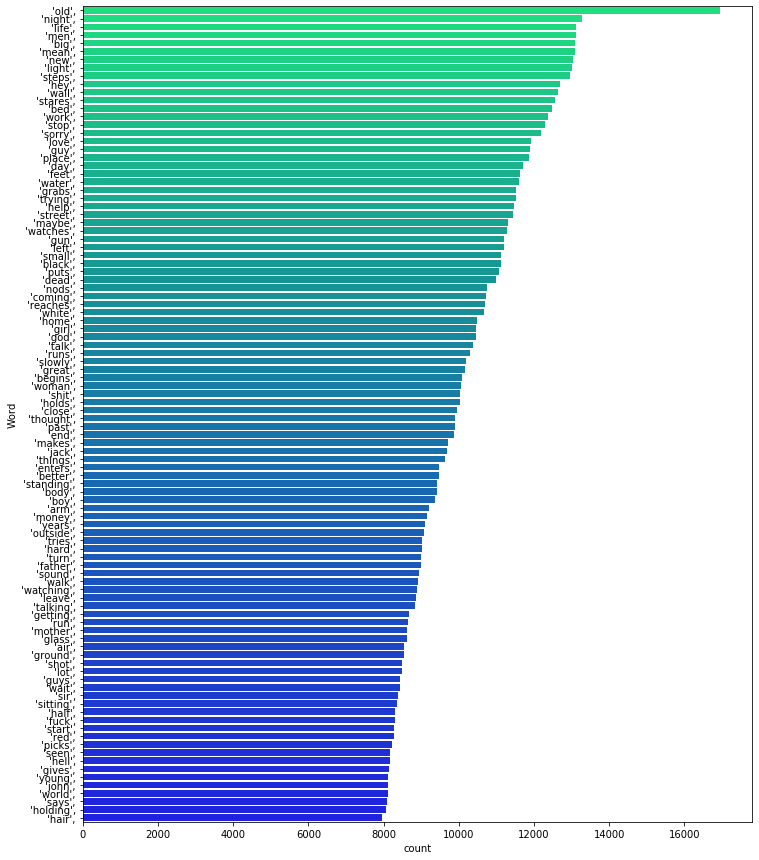

In [29]:
# print 100 most frequent words 
freq_words(df['text'], 100)

In [41]:
# Turn text column into strings for preprocessing purposes
# df['text'] = df['text'].apply(lambda x: " ".join(x))

In [30]:
df.to_csv("../../no_stop_words.csv", index = False)

### Lemmitization

In [31]:
df2 = pd.read_csv("../../no_stop_words.csv")

pd.set_option("display.max_rows", 50, "display.max_columns", 50, "display.max_colwidth", 400)

In [32]:
#Delist text column for preprocessing purposes
# df2['text'] = df2['text'].apply(eval).apply(' '.join)
df2['text'] = df2['text'].apply(eval).apply(' '.join)

In [34]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [35]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)]

df2['texts'] = df2['text'].apply(lambda x: lemmatize_text(x))

In [37]:
df2.to_csv('../../lemm_data.csv', index = False)

### Frequency Distribution

In [5]:
df_lemm = pd.read_csv('../../lemm_data.csv')

pd.set_option("display.max_rows", 50, "display.max_columns", 50, "display.max_colwidth", 400)

In [39]:
df_lemm

file_name  \
0                 Beasts_of_No_Nation.txt   
1                Beauty_and_the_Beast.txt   
2     Beavis_and_Butt-head_Do_America.txt   
3                           Beginners.txt   
4                         Being_Human.txt   
...                                   ...   
1136         Battle_of_Shaker_Heights.txt   
1137              Battle:_Los_Angeles.txt   
1138                             Bean.txt   
1139                            Beach.txt   
1140      Beasts_of_the_Southern_Wild.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                 text  \
0     cary joji fukunaga based novel uzodinma iweala dialogue screenplay faithful form novel originally lighter form nigerian pidgin english known krio krio lingua franca west africa gambia cameroon spoken millions accented starting angle plastic exterior screen television children running circles football pitch angle boy balancing warm smile clever littler best friend ones talent agu passes line ly...   
1     stephen chbosky evan spiliotopoulos based animated film beauty beast screenplay linda woolverton august resplendent bespeaking great wealth power grounds stonework immaculate hidden heart france handsome young prince lived beautiful castle single clinging rose bush stormy spring night plucks rose heart desired prince selfish unkind groomed servants faces paints exotic animal mask prince feathe...   
2     beavis butt america mike judge joe stillman location href location href mike judge joe stillman movie begins scenes screaming horror running streets big city ground shakes giant footsteps pieces building debris falling getting crushed power lines coming complete pandemonium japanese animated king kong godzilla movie footsteps getting closer ground shaking intense debris falling frame smash nat...   
3     mike mills single daisy vase kitchen clicks light closet rack parents clothes begins box marked home box marked thrift oliver enters bathroom flushes bottle bottle pills liquids toilet struggles old toothbrush hairbrush bottles tubes sink stares throws oliver hauls trash outside adding large pile bags older jack russell terrier follows oliver arthur sit office surrounded papers boxes books tra...   
4     forsyth january warner boulevard burbank california rights reserved stared sky listened cow mooing dreamily distant village tried understand meant sky fields humming telegraph pole felt point understanding started spin lucid languor intolerable vladimir nabokov script main characters inhabit different periods pre history present day story blend developing narrative lives suggestion travel inca...   
...                                                                                                                                                                                                                                                                                                                                                                                                               ...   
1136  erica beeney muffled wet green forest earth tremble darts log lifts hind legs sniffs air closer mix rumbling veritable symphony violence confusion lays splayed careless death pair flash trees running hunched low disappear gray blooms forest breath trembling leaves jeep coming closer fits low gears willys appears undergrowth driven private class eighteen meat insignias indicate infantry attract...   
1137  chris bertolini view vibrant striking vast space shimmering meets bird eye view relief criss cross streets freeways buildings dots notice sprawl city moving arrive frantic pitch sound streets jockey position movin

In [41]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,4), min_df = 10, max_df = .95, stop_words="english")
df_cv = cv.fit_transform(df_lemm.texts)
df_cv_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_cv_dtm.index = df_lemm.movie_title

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,4), min_df = 10, max_df = .95, stop_words='english')
df_tfidf = tfidf.fit_transform(df_lemm.texts)
tfidf_dtm = pd.DataFrame(df_tfidf.toarray(), columns=tfidf.get_feature_names())
tfidf_dtm.index = df_lemm.movie_title

In [47]:
import pickle
# Let's pickle it for later use
df_cv_dtm.to_pickle("../../cv_dtm.pkl")
tfidf_dtm.to_pickle("../../tfidf_dtm.pkl")

## Visualizing Data

Below is the display of the distribution of movie scripts for each genre. There are several genres with a small amount of scripts and so they will be left out of the modeling process.

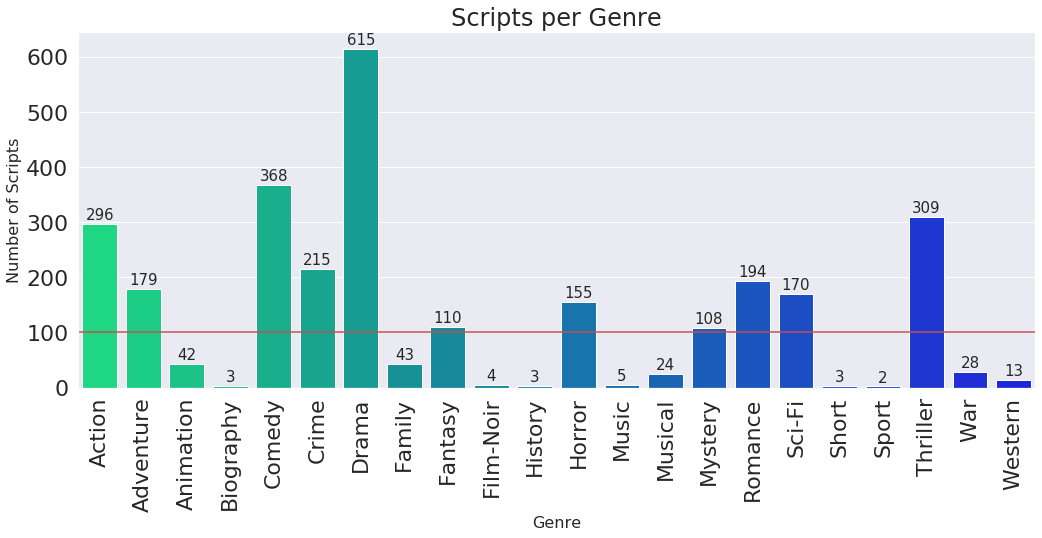

In [48]:
#Barplot for amount of scripts in each genre
categories = list(df_lemm.columns[4:-1].values)
sns.set(font_scale = 2, style = 'darkgrid')
plt.figure(figsize=(15,8))
color = cm.winter_r(np.linspace(.4,.8, 30))

ax= sns.barplot(categories, df_lemm.iloc[:,4:-1].sum().values, palette=("winter_r"))


plt.axhline(100, color = 'r')
plt.title("Scripts per Genre", fontsize=24)
plt.ylabel('Number of Scripts', fontsize=16)
plt.xlabel('Genre', fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                size = 15,
                xytext = (0, 9),
                textcoords = 'offset points')

plt.tight_layout()
plt.savefig('../../scripts_per_genre.png')

plt.show()

Below is the display of the number of genres assigned to movies. There is one movie in my sample that has seven genres assigned to it. The majority of films in my sample have between one and four genres assigned to them.

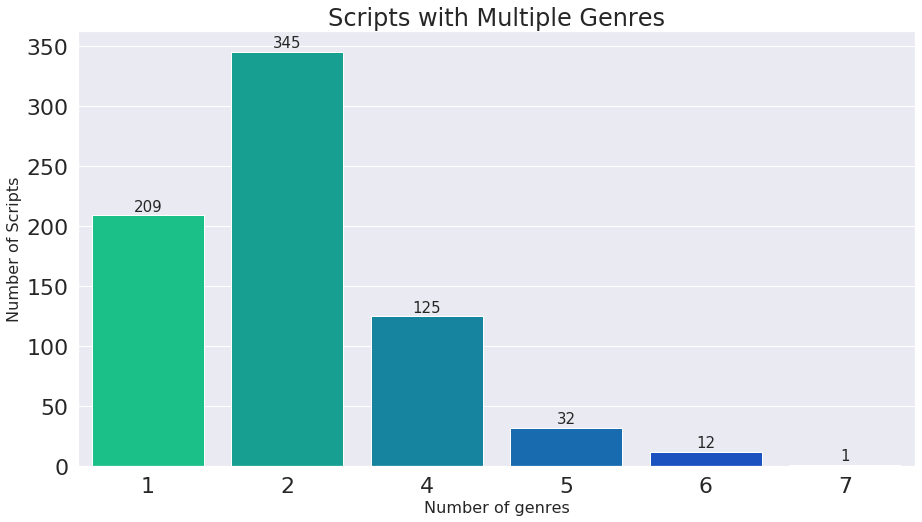

In [49]:
#Barplot for scripts that have multiple genres

rowSums = df_lemm.iloc[:,4:-1].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2, style = 'darkgrid')
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, palette=("winter_r"))
# ax.grid(False)

plt.title("Scripts with Multiple Genres")
plt.ylabel('Number of Scripts', fontsize=16)
plt.xlabel('Number of genres', fontsize=16)

#adding the text labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                size = 15,
                xytext = (0, 9),
                textcoords = 'offset points')
    
plt.savefig('../../scripts_multiple_genre.png')

plt.show()

### Most Common Words Bar Graphs

Below is the process of creating frequency distribution for the words in the top four genres. Below is the display of which words appear the most in Drama, Comedy, Action, and Thriller movies.

In [50]:
#Setting separate dataframes for these genres
df_drama = df_lemm[df_lemm['Drama']==1]
df_comedy = df_lemm[df_lemm['Comedy']==1]
df_action = df_lemm[df_lemm['Action']==1]
df_thriller = df_lemm[df_lemm['Thriller']==1]

In [51]:
#Assigning variables to the text column for these genres
drama_text = df_drama['texts']
comedy_text = df_comedy['texts']
action_text = df_action['texts']
thriller_text = df_thriller['texts']

In [52]:
drama_text = drama_text.apply(eval).apply(' '.join)
comedy_text = comedy_text.apply(eval).apply(' '.join)
action_text = action_text.apply(eval).apply(' '.join)
thriller_text = thriller_text.apply(eval).apply(' '.join)

In [54]:
script_drama = drama_text.apply(word_tokenize)
script_comedy = comedy_text.apply(word_tokenize)
script_action = action_text.apply(word_tokenize)
script_thriller = thriller_text.apply(word_tokenize)

In [55]:
flat_drama = [sublist for sublist in script_drama]
flat_comedy = [sublist for sublist in script_comedy]
flat_action = [sublist for sublist in script_action]
flat_thriller = [sublist for sublist in script_thriller]

In [56]:
import itertools
drama_one = list(itertools.chain.from_iterable(flat_drama))
comedy_one = list(itertools.chain.from_iterable(flat_comedy))
action_one = list(itertools.chain.from_iterable(flat_action))
thriller_one = list(itertools.chain.from_iterable(flat_thriller))

In [57]:
drama_str = ' '.join(map(str, drama_one)) 
comedy_str = ' '.join(map(str, comedy_one)) 
action_str = ' '.join(map(str, action_one)) 
thriller_str = ' '.join(map(str, thriller_one))

In [58]:
#tokenize text for each genre
drama_token = nltk.word_tokenize(drama_str)
comedy_token = nltk.word_tokenize(comedy_str)
action_token = nltk.word_tokenize(action_str)
thriller_token = nltk.word_tokenize(thriller_str)

In [59]:
#create frequency distribution for following genres
drama_freq = FreqDist(drama_token)
comedy_freq = FreqDist(comedy_token)
action_freq = FreqDist(action_token)
thriller_freq = FreqDist(thriller_token)

In [60]:
# Top 20 thriller words:
thriller_freq.most_common(25)

[('hold', 7473),
 ('run', 7314),
 ('light', 6804),
 ('try', 6672),
 ('fuck', 6324),
 ('gun', 6237),
 ('guy', 6121),
 ('talk', 6067),
 ('watch', 6032),
 ('work', 5962),
 ('close', 5834),
 ('step', 5647),
 ('reach', 5353),
 ('wait', 5216),
 ('wall', 5182),
 ('arm', 5099),
 ('stare', 5058),
 ('foot', 4956),
 ('come', 4777),
 ('stand', 4731),
 ('old', 4724),
 ('grab', 4586),
 ('place', 4567),
 ('kill', 4507),
 ('walk', 4446)]

In [61]:
# create counts of genre with values and words
drama_bar_counts = [x[1] for x in drama_freq.most_common(25)]
drama_bar_words = [x[0] for x in drama_freq.most_common(25)]

comedy_bar_counts = [x[1] for x in comedy_freq.most_common(25)]
comedy_bar_words = [x[0] for x in comedy_freq.most_common(25)]

action_bar_counts = [x[1] for x in action_freq.most_common(25)]
action_bar_words = [x[0] for x in action_freq.most_common(25)]

thriller_bar_counts = [x[1] for x in thriller_freq.most_common(25)]
thriller_bar_words = [x[0] for x in thriller_freq.most_common(25)]

In [62]:
# setting the color of our bar graphs
color = cm.winter_r(np.linspace(.4,.8, 30))

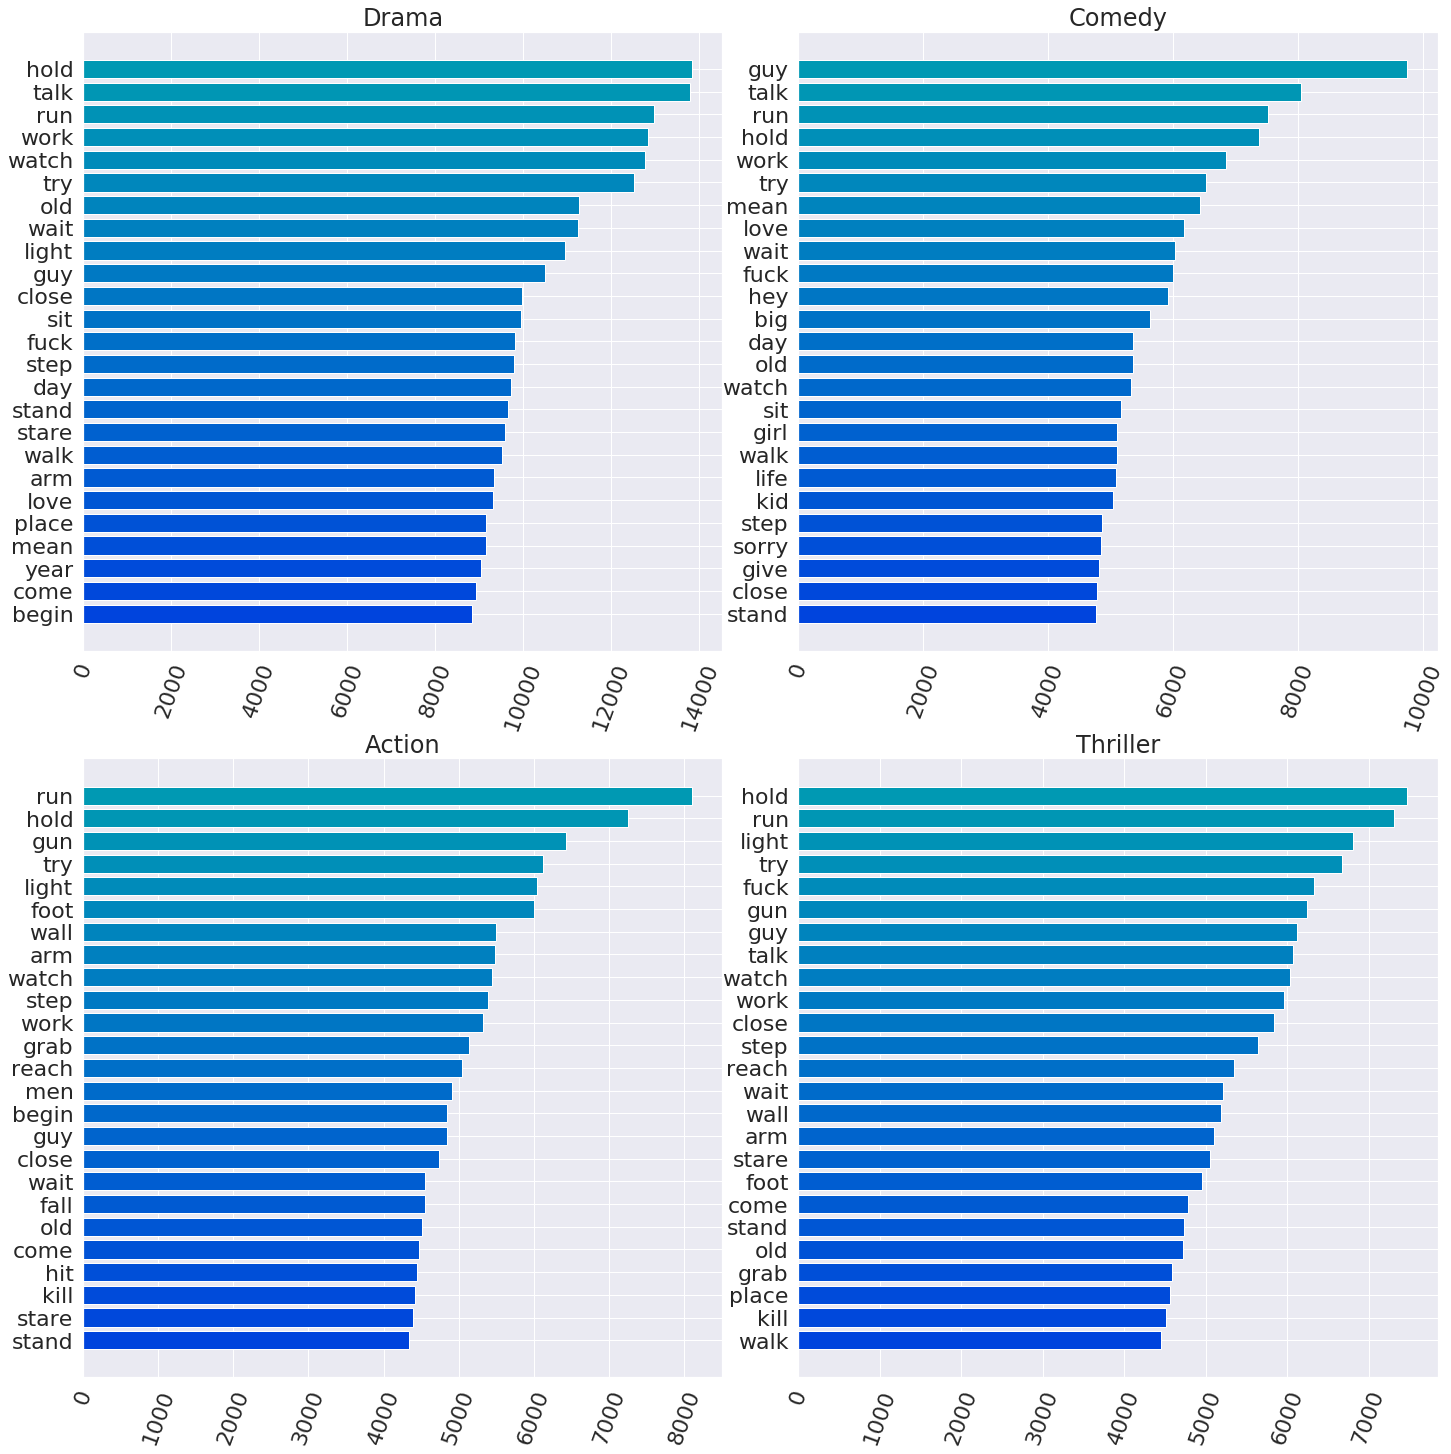

In [63]:
#Plot each graph on a different axis
new_figure = plt.figure(figsize=(20,20))

ax = new_figure.add_subplot(221)
ax2 = new_figure.add_subplot(222)
ax3 = new_figure.add_subplot(223)
ax4 = new_figure.add_subplot(224)


# Generate a line plot on first axes
ax.barh(drama_bar_words, drama_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.barh(comedy_bar_words, comedy_bar_counts, color=color)

# Draw a scatter plot on 3rd axes
ax3.barh(action_bar_words, action_bar_counts, color=color)

# Draw a scatter plot on 4th axes
ax4.barh(thriller_bar_words, thriller_bar_counts, color=color)


ax.title.set_text('Drama')
ax2.title.set_text('Comedy')
ax3.title.set_text('Action')
ax4.title.set_text('Thriller')


for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)
    plt.gca().invert_yaxis()


plt.tight_layout(pad=0)

# plt.yscale()
plt.savefig('../../word_count_bar_graphs.png')
plt.show()

### Wordclouds

Another way to visualize the distribution of words in each genre is to use a word cloud. Below I create word clouds for the top six genres.

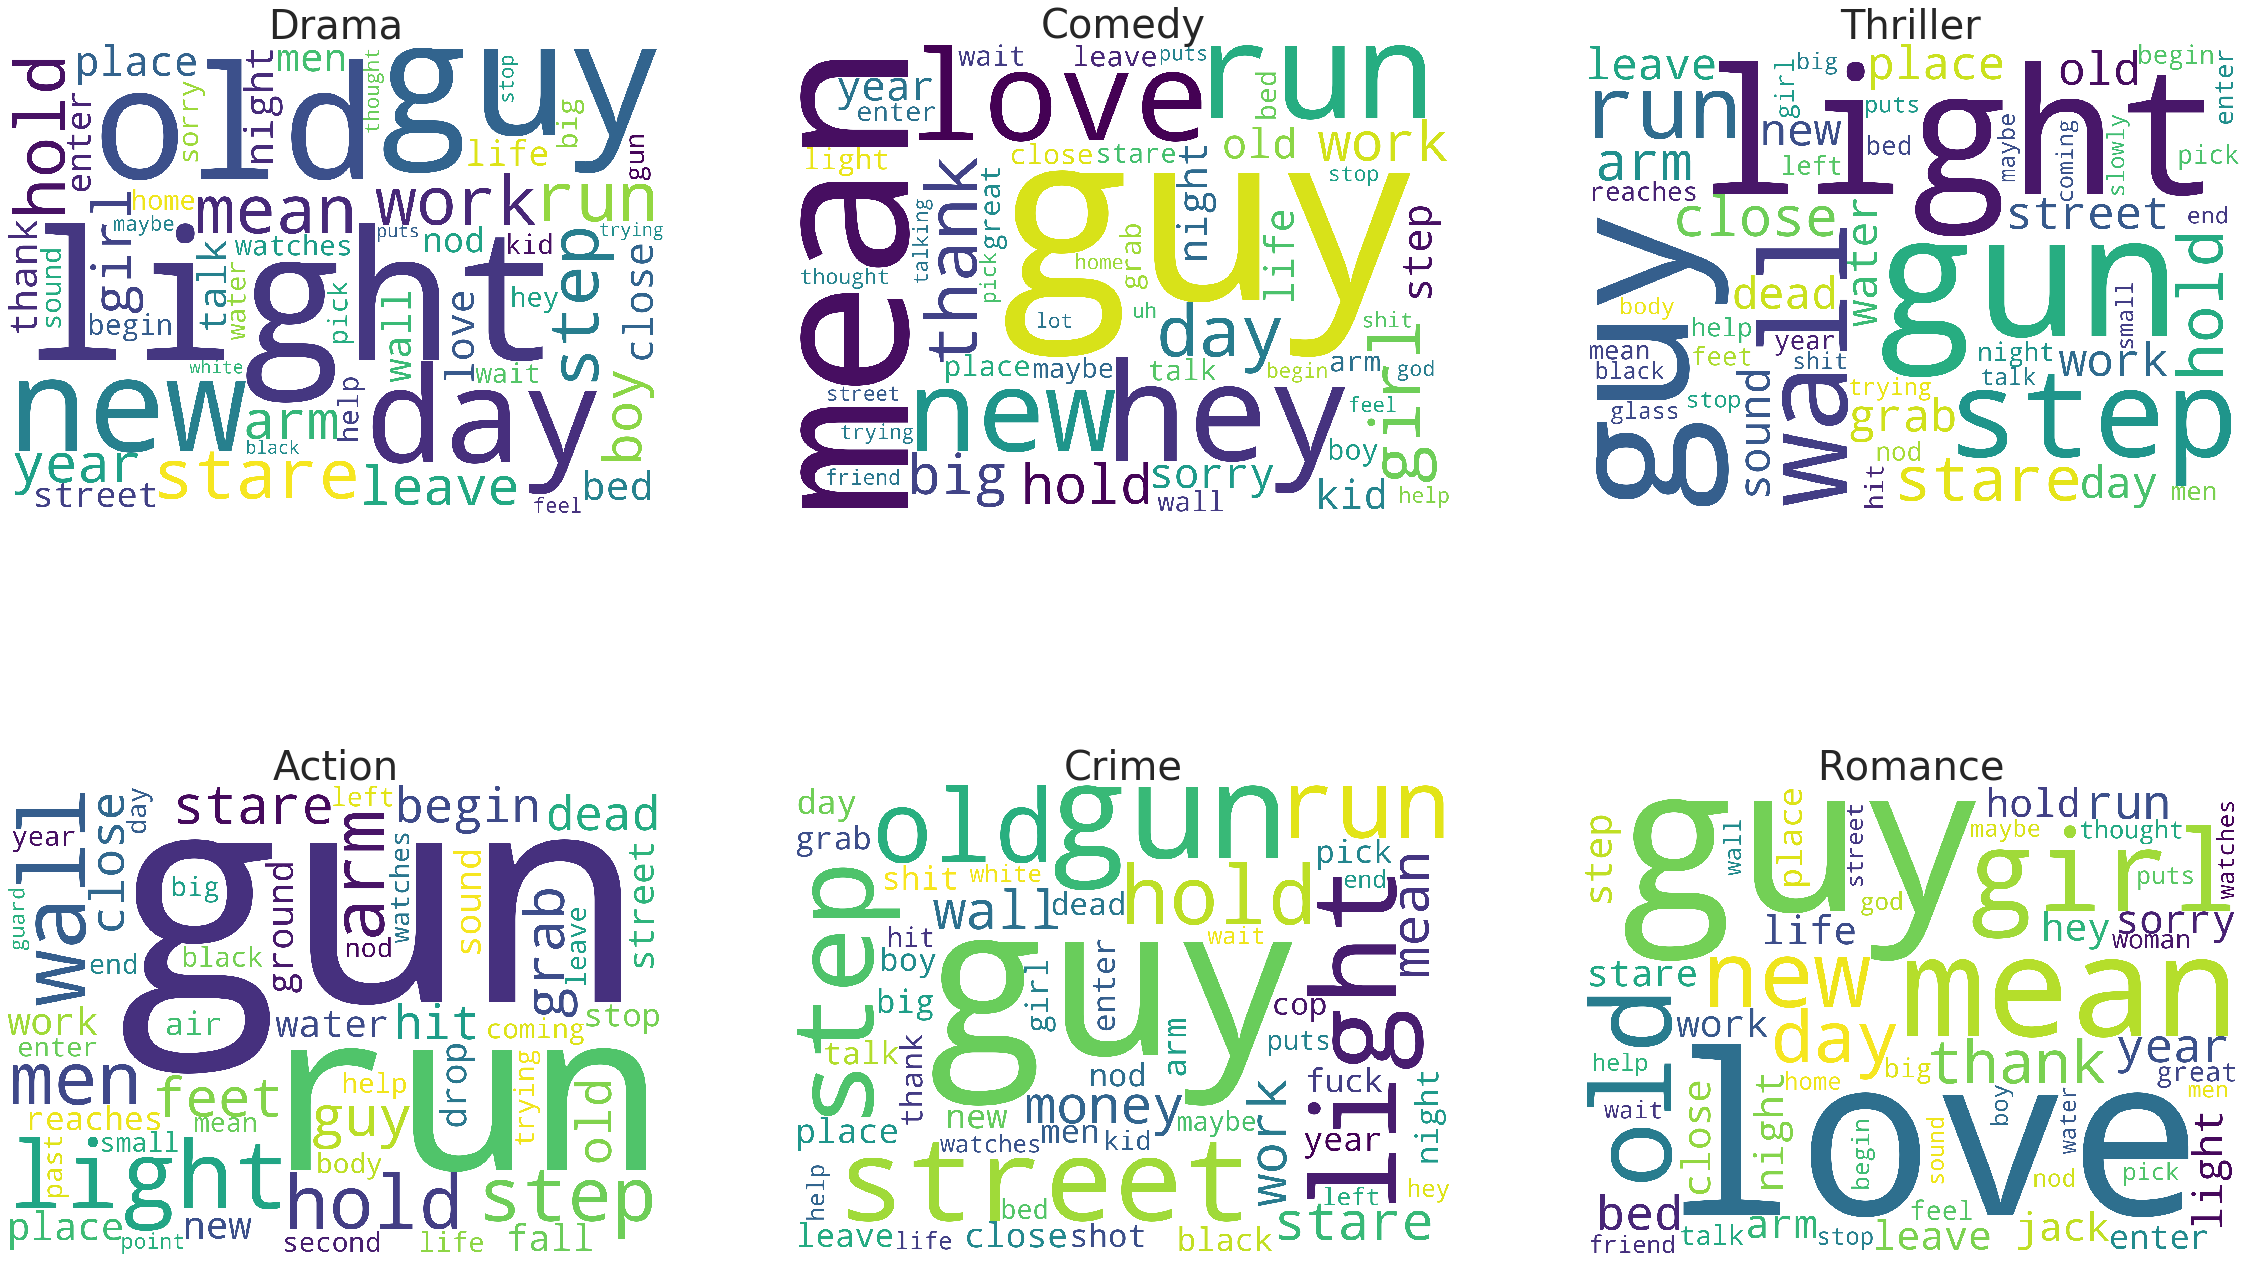

In [64]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))

# drama
subset = df_lemm[df_lemm.Drama==1]
text = [line for line in subset.text.values]
cloud_drama = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        collocations=False,
                        max_words=50,
                        width=2500,
                        height=1800).generate(str(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Drama",fontsize=40)
plt.imshow(cloud_drama)


# comedy
subset = df_lemm[df_lemm.Comedy==1]
text = [line for line in subset.text.values]
cloud_comedy = WordCloud(stopwords=STOPWORDS,
                         background_color='white',
                         collocations=False,
                         max_words=50,
                         width=2500,
                         height=1800).generate(str(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Comedy",fontsize=40)
plt.imshow(cloud_comedy)



# Thriller
subset = df_lemm[df_lemm.Thriller==1]
text = [line for line in subset.text.values]
cloud_thriller = WordCloud(stopwords=STOPWORDS,
                           background_color='white',
                           collocations=False,
                           max_words=50,
                           width=2500,
                           height=1800).generate(str(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Thriller",fontsize=40)
plt.imshow(cloud_thriller)


# action
subset = df_lemm[df_lemm.Action==1]
text = [line for line in subset.text.values]
cloud_action = WordCloud(stopwords=STOPWORDS,
                         background_color='white',
                         collocations=False,
                         max_words=50,
                         width=2500,
                         height=1800).generate(str(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Action",fontsize=40)
plt.imshow(cloud_action)


# crime
subset = df_lemm[df_lemm.Crime==1]
text = [line for line in subset.text.values]
cloud_crime = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        collocations=False,
                        max_words=50,
                        width=2500,
                        height=1800).generate(str(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Crime",fontsize=40)
plt.imshow(cloud_crime)


# romance
subset = df_lemm[df_lemm.Romance==1]
text = [line for line in subset.text.values]
cloud_romance = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          max_words=50,
                          width=2500,
                          height=1800).generate(str(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Romance",fontsize=40)
plt.imshow(cloud_romance)
plt.savefig('../../wordcloud.png')
plt.get_cmap('winter_r')
plt.show()



### Train-Test-Split

In [6]:
#Additional data cleaning
df_lemm['texts'] = df_lemm['texts'].apply(nfx.remove_multiple_spaces)

In [7]:
#setting variable to text column
script_corpus = df_lemm['texts'].apply(nfx.clean_text)

In [8]:
#Setting categories for top eleven genres
categories = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']
print(categories)

['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']


In [9]:
#Defining X and y variable prior to train-test-split
X = script_corpus
y = df_lemm[categories]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
#Preview the shape of training and test set
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (855,)
y_train Shape: (855, 11)
X_test Shape: (286,)
y_test Shape: (286, 11)


### Assigning weights

In [12]:
cate = pd.DataFrame(y.sum()).reset_index().rename(columns = {'index':'genres1',0:'count'})
cate.head()

genres1  count
0     Action    296
1  Adventure    179
2     Comedy    368
3      Crime    215
4      Drama    615

In [13]:
labels1 = cate.genres1.values

In [14]:
labels1

array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy',
       'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller'], dtype=object)

In [15]:
cate['class_weight'] = len(cate) / cate['count']
class_weights = {}
for index, label in enumerate(labels1):
    class_weights[index] = cate[cate['genres1'] == label]['class_weight'].values[0]
    
cate.head()

genres1  count  class_weight
0     Action    296      0.037162
1  Adventure    179      0.061453
2     Comedy    368      0.029891
3      Crime    215      0.051163
4      Drama    615      0.017886

### Baseline Accuracy for each Category

Instead of training models to predict on all of the movie genres avaiable, there are some whose sample size is too small to provide any insight so I am only training models to predict on the genres that have at least 100 movies in their category.

Here I am viewing what baseline accuracy would look like for each genre. Below you can also view some class imbalance in a handful of the genre categories.

Normalized Value Count for Action Scripts
0    0.740578
1    0.259422
Name: Action, dtype: float64


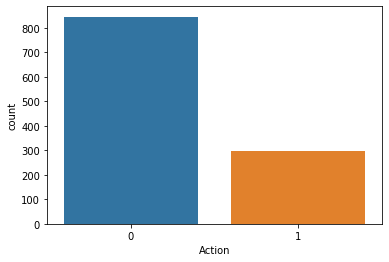

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Adventure Scripts
0    0.84312
1    0.15688
Name: Adventure, dtype: float64


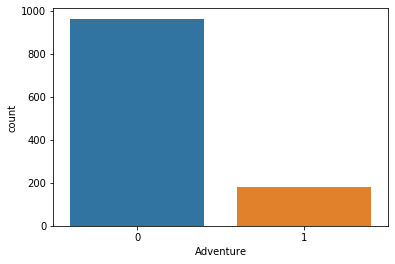

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Comedy Scripts
0    0.677476
1    0.322524
Name: Comedy, dtype: float64


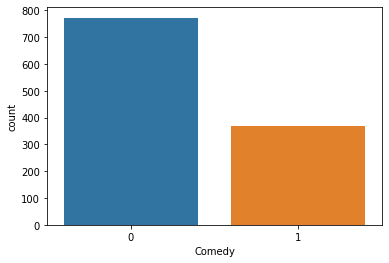

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Crime Scripts
0    0.811569
1    0.188431
Name: Crime, dtype: float64


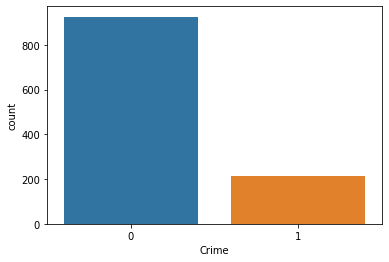

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Drama Scripts
1    0.539001
0    0.460999
Name: Drama, dtype: float64


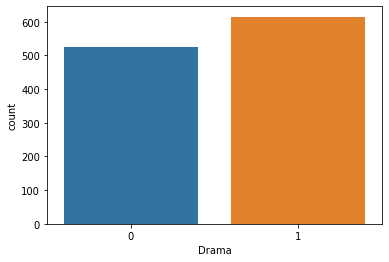

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Fantasy Scripts
0    0.903593
1    0.096407
Name: Fantasy, dtype: float64


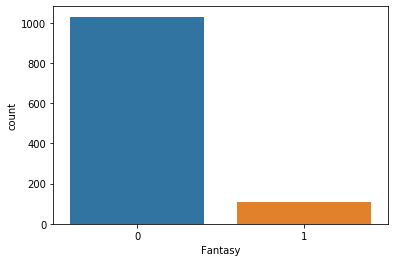

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Horror Scripts
0    0.864154
1    0.135846
Name: Horror, dtype: float64


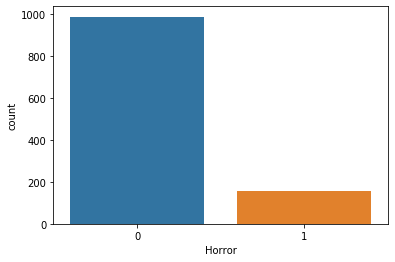

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Mystery Scripts
0    0.905346
1    0.094654
Name: Mystery, dtype: float64


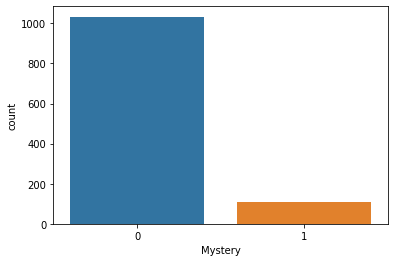

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Romance Scripts
0    0.829974
1    0.170026
Name: Romance, dtype: float64


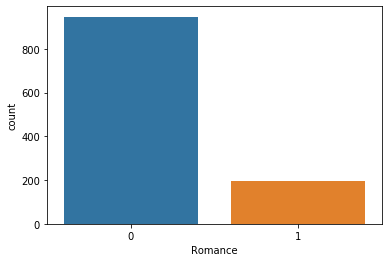

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Sci-Fi Scripts
0    0.851008
1    0.148992
Name: Sci-Fi, dtype: float64


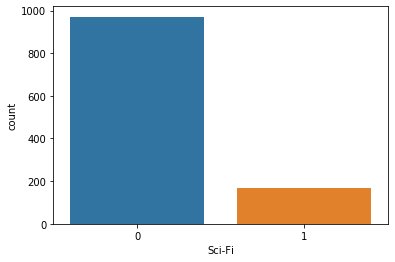

AxesSubplot(0.125,0.125;0.775x0.755) None


Normalized Value Count for Thriller Scripts
0    0.729185
1    0.270815
Name: Thriller, dtype: float64


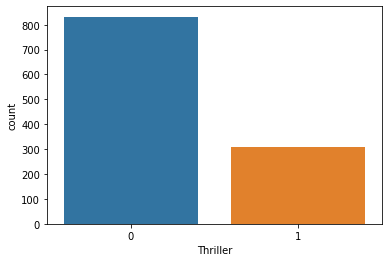

AxesSubplot(0.125,0.125;0.775x0.755) None




In [20]:
#View value counts to measure baseline accuracy
for category in categories:
    print('Normalized Value Count for {} Scripts'.format(category))
    print(y[category].value_counts(normalize=True))
    print(sns.countplot(y[category], ), plt.show())
    print("\n")
    

### TF-IDF

After train-test-split, I vectorize my train and test set and proceed with modeling.

In [22]:
tfidf = TfidfVectorizer(ngram_range=(1,4), min_df = 10 , max_df = .90, max_features = 20000, stop_words='english')

tfidf_train_lem = tfidf.fit_transform(X_train)
tfidf_test_lem = tfidf.transform(X_test)


In [23]:
non_zero_cols = tfidf_train_lem.nnz / float(tfidf_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 2185.0011695906433
Percentage of columns containing ZERO: 0.8907499415204678


## LDA

In [25]:
# !pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
%matplotlib inline

In [25]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 



In [84]:
# vectorize the corpus
count_vectorizer = CountVectorizer(min_df=10, max_df=0.95, ngram_range=(1,1), stop_words='english')
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_df=0.95, ngram_range=(1,1), stop_words='english')

# calculate the feature matrix
cv_matrix = count_vectorizer.fit_transform(df_lemm.texts)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_lemm.texts)

print(cv_matrix.shape)
print(tfidf_matrix.shape)

(1141, 20022)
(1141, 20022)


In [80]:
!pip install pyLDAvis

In [54]:
from sklearn.decomposition import NMF

In [55]:
nmf = NMF(n_components=11, random_state=42,  alpha=0.1, l1_ratio=0.5)
nmf_output = nmf.fit_transform(tfidf_matrix)

nmf_feature_names = tfidf_vectorizer.get_feature_names()
nmf_weights = nmf.components_

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [85]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=20, learning_method = 'online', random_state=42, n_jobs=-1) 

# fit transform the feature matrix
lda_output = lda_model.fit_transform(cv_matrix)

# view the lda_output and its shape
# print(lda_output)
print(lda_output.shape)

(1141, 20)


In [66]:
lda_feature_names = count_vectorizer.get_feature_names()

In [ ]:
cv = CountVectorizer(min_df=5, stop_words="english")
df_cv = cv.fit_transform(df_lemm.texts)
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_lemm.movie_title
df_dtm

In [24]:
vis = pyLDAvis.sklearn.prepare(lda_model, cv_matrix, count_vectorizer)
pyLDAvis.display(vis)


In [58]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [83]:
show_topics(cv, lda_model, 20)

[array(['jack', 'ali', 'willie', 'lucy', 'tyler', 'zoe', 'hold', 'run',
        'shrek', 'wayne', 'egg', 'try', 'grab', 'script', 'wade', 'hawk',
        'baby', 'nikki', 'guy', 'martha'], dtype='<U20'),
 array(['charlie', 'nick', 'ray', 'car', 'alex', 'adam', 'james', 'edward',
        'jesse', 'vivian', 'run', 'dorothy', 'abby', 'try', 'room', 'old',
        'road', 'kelly', 'watch', 'step'], dtype='<U20'),
 array(['leonard', 'miguel', 'brendan', 'brad', 'jody', 'mariachi',
        'teddy', 'sammy', 'guitar', 'mean', 'dude', 'play', 'run', 'grab',
        'cruz', 'case', 'shoot', 'kenny', 'room', 'family'], dtype='<U20'),
 array(['amy', 'jeff', 'eric', 'virgil', 'nina', 'earl', 'stacy', 'duncan',
        'charley', 'erica', 'burt', 'step', 'jerry', 'val', 'reach',
        'stella', 'stare', 'truck', 'rhonda', 'apartment'], dtype='<U20'),
 array(['ted', 'guy', 'fuck', 'jacob', 'hey', 'scott', 'eddie', 'jimmy',
        'good', 'mike', 'shit', 'camera', 'jay', 'mean', 'talk', 'love',
  

## LDA

In [18]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=100, learning_method = 'online', max_iter=25, random_state=42, n_jobs=-1) 

In [19]:
train_topics = lda.fit_transform(tfidf_train_lem)
test_topics = lda.transform(tfidf_test_lem)


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
# For each topic (a row in the components_), sort the features (ascending) # Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer
feature_names = np.array(tfidf.get_feature_names())

In [ ]:
import mglearn
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                                sorting=sorting, topics_per_chunk=7, n_words=20)

## Grid Search

In [82]:
from sklearn.model_selection import GridSearchCV

In [158]:
ovr_classifier.get_params().keys()

dict_keys(['estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
%%time

ovr_classifier = OneVsRestClassifier(RandomForestClassifier(class_weight='balanced',random_state = 42))


parameters = {'estimator__max_depth': [None, 50, 100],
              'estimator__max_features': [2, 3, 5, 10, 15, 50],
              'estimator__min_samples_leaf': [3, 5],
              'estimator__min_samples_split': [8, 10],
              'estimator__criterion': ['gini', 'entropy'],
              'estimator__n_estimators': [50, 100, 300, 1000]}

clf = GridSearchCV(ovr_classifier, parameters, scoring='f1_micro',verbose=2)
clf.fit(tfidf_train_lem, y_train)

print(clf.best_params_) 
print(clf.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.2s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.3s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.3s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.3s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__min_

[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.2s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.3s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.3s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.3s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.6s

[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.4s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.4s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.4s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.7s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.7

[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.4s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.2s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.6s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.5s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.

[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=50; total time=   3.5s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   6.0s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.9s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   6.0s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   6

[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   6.0s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.9s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.9s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   5.9s
[CV] END estimator__criterion=gini, estimator__max_depth=None, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__min_samples_split=8, estimator__n_estimators=100; total time=   

## Modeling

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import multilabel_confusion_matrix
# model_prediction = model.predict(y_true)
# confusion_matrix(y_test, model_prediction)
def confusion_matrix_baseline(model, xtrain, ytrain, xtest):
    for category in categories:
        print('Confusion Matrix: {}'.format(category))
        model.fit(xtrain, ytrain[category])
        model_prediction = model.predict(xtest)
        print('Testing accuracy is {}'.format(round(accuracy_score(y_test[category], model_prediction) * 100, 2)))
        print('F1 test score is {}'.format(round(f1_score(y_test[category], model_prediction) * 100, 2)))
        cm = confusion_matrix(y_test[category], model_prediction)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(cmap='Blues')
        plt.show() 


In [28]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
rf = Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators = 50, criterion = 'entropy', class_weight='balanced',random_state = 42), n_jobs=-1))])

print("Random Forest Classifier")
print("\n")

for category in categories:
    print('Processing {} scripts'.format(category))
    
    # Fitting logistic regression model on train data
    rf.fit(tfidf_train_lem, y_train[category])
    
    # predict on test set
    rf_train_prediction = rf.predict(tfidf_train_lem)
    rf_test_prediction = rf.predict(tfidf_test_lem)
    
    # calculating test accuracy
    print('Training accuracy is {}'.format(round(accuracy_score(y_train[category], rf_train_prediction) * 100, 2)))
    print('F1 train score is {}'.format(round(f1_score(y_train[category], rf_train_prediction) * 100, 2)))
    print("--------------")
    print('Training accuracy is {}'.format(round(accuracy_score(y_test[category], rf_test_prediction) * 100, 2)))
    print('F1 test score is {}'.format(round(f1_score(y_test[category], rf_test_prediction) * 100, 2)))
    print("\n")


Random Forest Classifier


Processing Action scripts
Training accuracy is 100.0
F1 train score is 100.0
--------------
Training accuracy is 79.37
F1 test score is 37.89


Processing Adventure scripts
Training accuracy is 99.65
F1 train score is 98.92
--------------
Training accuracy is 86.36
F1 test score is 9.3


Processing Comedy scripts
Training accuracy is 99.88
F1 train score is 99.81
--------------
Training accuracy is 71.33
F1 test score is 37.88


Processing Crime scripts
Training accuracy is 100.0
F1 train score is 100.0
--------------
Training accuracy is 79.37
F1 test score is 3.28


Processing Drama scripts
Training accuracy is 100.0
F1 train score is 100.0
--------------
Training accuracy is 73.43
F1 test score is 77.25


Processing Fantasy scripts
Training accuracy is 100.0
F1 train score is 100.0
--------------
Training accuracy is 89.51
F1 test score is 0.0


Processing Horror scripts
Training accuracy is 100.0
F1 train score is 100.0
--------------
Training accuracy is

Confusion Matrix: Action
Testing accuracy is 79.37
F1 test score is 37.89


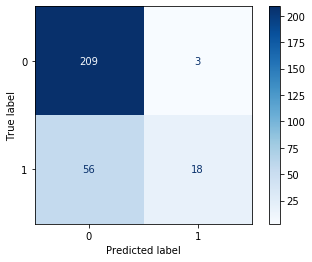

Confusion Matrix: Adventure
Testing accuracy is 86.36
F1 test score is 9.3


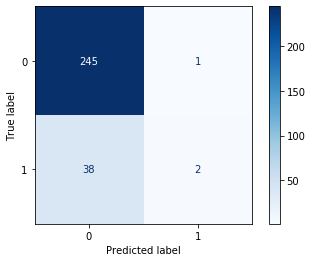

Confusion Matrix: Comedy
Testing accuracy is 71.33
F1 test score is 37.88


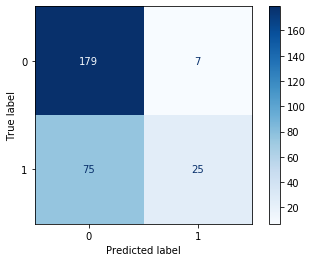

Confusion Matrix: Crime
Testing accuracy is 79.37
F1 test score is 3.28


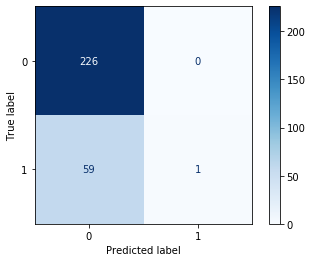

Confusion Matrix: Drama
Testing accuracy is 73.43
F1 test score is 77.25


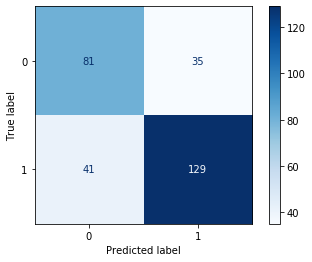

Confusion Matrix: Fantasy
Testing accuracy is 89.51
F1 test score is 0.0


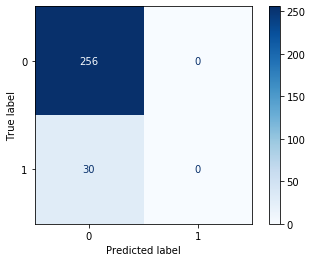

Confusion Matrix: Horror
Testing accuracy is 85.66
F1 test score is 0.0


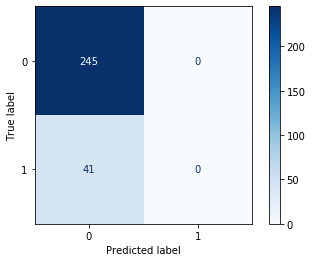

Confusion Matrix: Mystery
Testing accuracy is 90.91
F1 test score is 0.0


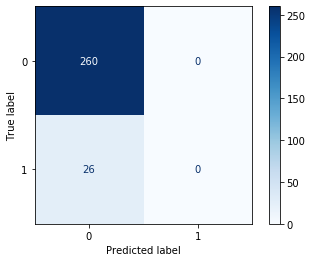

Confusion Matrix: Romance
Testing accuracy is 81.47
F1 test score is 0.0


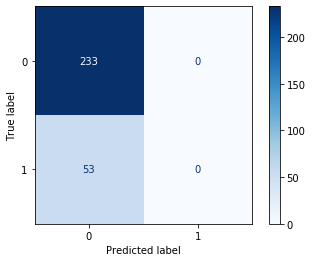

Confusion Matrix: Sci-Fi
Testing accuracy is 88.46
F1 test score is 29.79


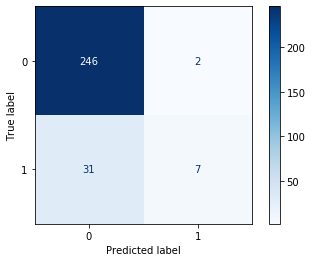

Confusion Matrix: Thriller
Testing accuracy is 71.68
F1 test score is 12.9


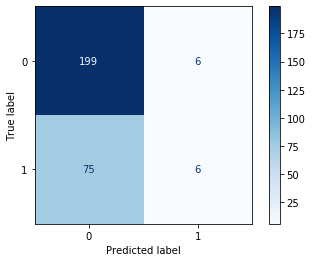

In [32]:
confusion_matrix_baseline(rf, tfidf_train_lem, y_train, tfidf_test_lem)

### Logistic Regression Pipeline

In [33]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag', class_weight='balanced'), n_jobs=-1))])

print("Logistic Regression Pipeline")
print("\n")

for category in categories:
    print('Processing {} scripts'.format(category))
    
    # Fitting logistic regression model on train data
    LogReg_pipeline.fit(tfidf_train_lem, y_train[category])
    
    # predict on test set
    LR_train_prediction = LogReg_pipeline.predict(tfidf_train_lem)
    LR_test_prediction = LogReg_pipeline.predict(tfidf_test_lem)
    
    # calculating test accuracy
    print('Train accuracy is {}'.format(round(accuracy_score(y_train[category], LR_train_prediction) * 100, 2)))
    print('F1 train score is {}'.format(round(f1_score(y_train[category], LR_train_prediction) * 100, 2)))
    print("---------------------")
    print('Testing accuracy is {}'.format(round(accuracy_score(y_test[category], LR_test_prediction) * 100, 2)))
    print('F1 test score is {}'.format(round(f1_score(y_test[category], LR_test_prediction) * 100, 2)))
    print("\n")

Logistic Regression Pipeline


Processing Action scripts
Train accuracy is 95.67
F1 train score is 92.11
---------------------
Testing accuracy is 82.52
F1 test score is 63.77


Processing Adventure scripts
Train accuracy is 95.79
F1 train score is 88.46
---------------------
Testing accuracy is 85.66
F1 test score is 51.76


Processing Comedy scripts
Train accuracy is 94.27
F1 train score is 91.33
---------------------
Testing accuracy is 72.38
F1 test score is 60.7


Processing Crime scripts
Train accuracy is 95.2
F1 train score is 88.18
---------------------
Testing accuracy is 77.62
F1 test score is 38.46


Processing Drama scripts
Train accuracy is 93.33
F1 train score is 93.6
---------------------
Testing accuracy is 67.83
F1 test score is 70.51


Processing Fantasy scripts
Train accuracy is 97.43
F1 train score is 87.91
---------------------
Testing accuracy is 88.46
F1 test score is 37.74


Processing Horror scripts
Train accuracy is 97.19
F1 train score is 90.48
--------------

Confusion Matrix: Action
Testing accuracy is 82.52
F1 test score is 63.77


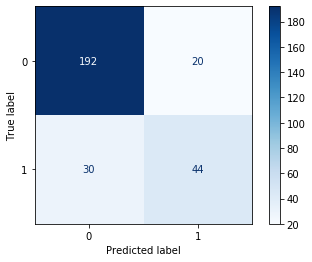

Confusion Matrix: Adventure
Testing accuracy is 85.66
F1 test score is 51.76


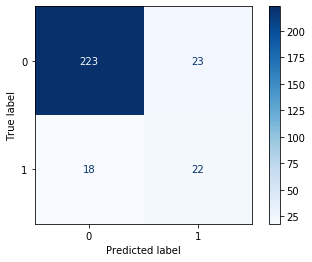

Confusion Matrix: Comedy
Testing accuracy is 72.38
F1 test score is 60.7


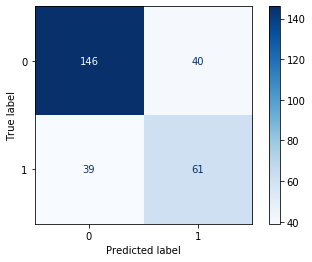

Confusion Matrix: Crime
Testing accuracy is 77.62
F1 test score is 38.46


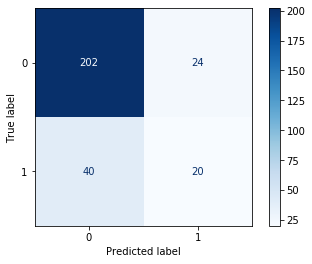

Confusion Matrix: Drama
Testing accuracy is 67.83
F1 test score is 70.51


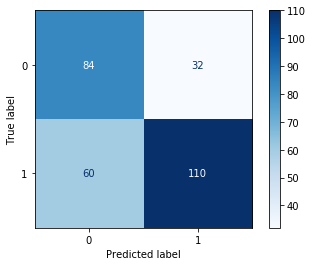

Confusion Matrix: Fantasy
Testing accuracy is 88.46
F1 test score is 37.74


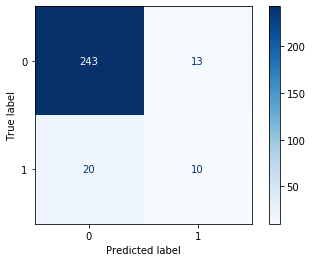

Confusion Matrix: Horror
Testing accuracy is 86.71
F1 test score is 42.42


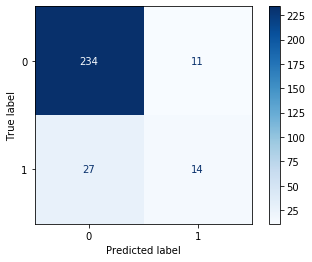

Confusion Matrix: Mystery
Testing accuracy is 87.41
F1 test score is 21.74


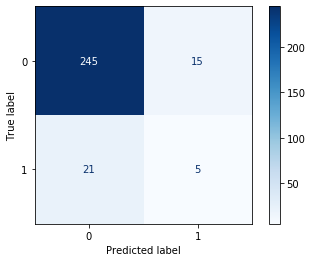

Confusion Matrix: Romance
Testing accuracy is 76.92
F1 test score is 37.74


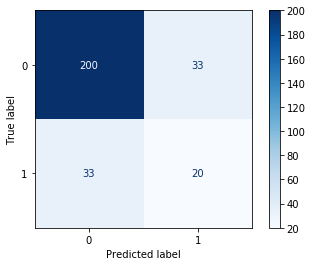

Confusion Matrix: Sci-Fi
Testing accuracy is 88.11
F1 test score is 52.78


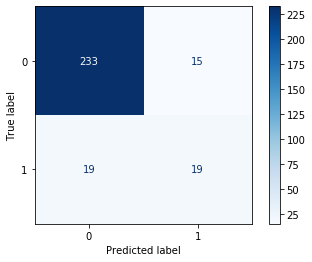

Confusion Matrix: Thriller
Testing accuracy is 70.28
F1 test score is 42.95


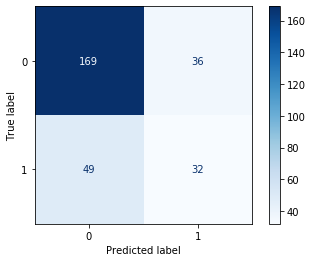

In [34]:
confusion_matrix_baseline(LogReg_pipeline, tfidf_train_lem, y_train, tfidf_test_lem)

### Linear Support Vector Classifier

In [35]:
from sklearn.svm import LinearSVC

SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(class_weight='balanced'), n_jobs= -1))])

print("Linear Support Vector Classifier")
print("\n")

for category in categories:
    print('Processing {} scripts'.format(category))
    
    # Fitting logistic regression model on train data
    SVC_pipeline.fit(tfidf_train_lem, y_train[category])
    
    # predict on test set
    SVC_train_prediction = SVC_pipeline.predict(tfidf_train_lem)
    SVC_test_prediction = SVC_pipeline.predict(tfidf_test_lem)
    
    # calculating test accuracy
    print('Training accuracy is {}'.format(round(accuracy_score(y_train[category], SVC_train_prediction) * 100, 2)))
    print('F1 train score is {}'.format(round(f1_score(y_train[category], SVC_train_prediction) * 100, 2)))
    print("-----------------------")
    print('Testing accuracy is {}'.format(round(accuracy_score(y_test[category], SVC_test_prediction) * 100, 2)))
    print('F1 test score is {}'.format(round(f1_score(y_test[category], SVC_test_prediction) * 100, 2)))
    print("\n")

Linear Support Vector Classifier


Processing Action scripts
Training accuracy is 99.18
F1 train score is 98.45
-----------------------
Testing accuracy is 82.17
F1 test score is 62.77


Processing Adventure scripts
Training accuracy is 99.06
F1 train score is 97.18
-----------------------
Testing accuracy is 88.46
F1 test score is 58.23


Processing Comedy scripts
Training accuracy is 98.6
F1 train score is 97.79
-----------------------
Testing accuracy is 73.78
F1 test score is 61.93


Processing Crime scripts
Training accuracy is 98.71
F1 train score is 96.57
-----------------------
Testing accuracy is 76.92
F1 test score is 34.0


Processing Drama scripts
Training accuracy is 98.95
F1 train score is 98.99
-----------------------
Testing accuracy is 63.99
F1 test score is 66.88


Processing Fantasy scripts
Training accuracy is 99.53
F1 train score is 97.56
-----------------------
Testing accuracy is 88.81
F1 test score is 30.43


Processing Horror scripts
Training accuracy is 98.95


Confusion Matrix: Action
Testing accuracy is 82.17
F1 test score is 62.77


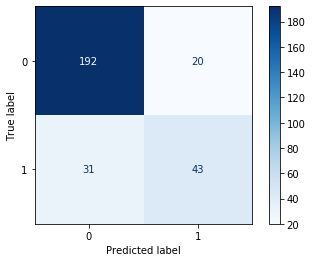

Confusion Matrix: Adventure
Testing accuracy is 88.46
F1 test score is 58.23


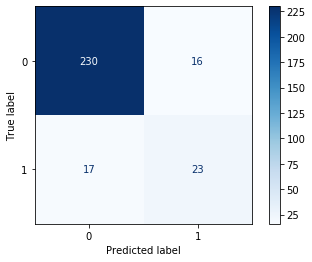

Confusion Matrix: Comedy
Testing accuracy is 73.78
F1 test score is 61.93


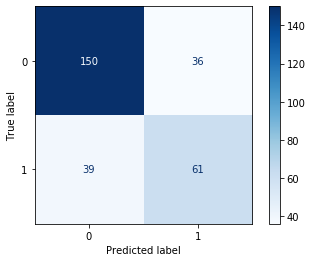

Confusion Matrix: Crime
Testing accuracy is 76.92
F1 test score is 34.0


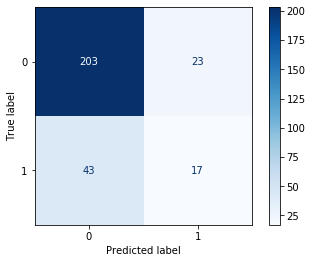

Confusion Matrix: Drama
Testing accuracy is 63.99
F1 test score is 66.88


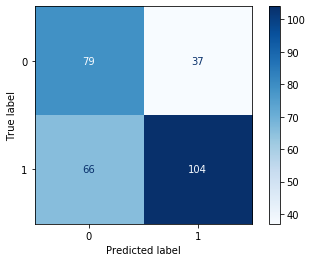

Confusion Matrix: Fantasy
Testing accuracy is 88.81
F1 test score is 30.43


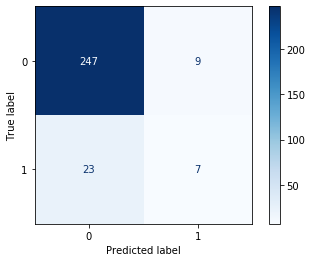

Confusion Matrix: Horror
Testing accuracy is 86.36
F1 test score is 38.1


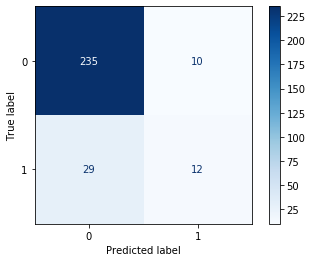

Confusion Matrix: Mystery
Testing accuracy is 88.46
F1 test score is 19.51


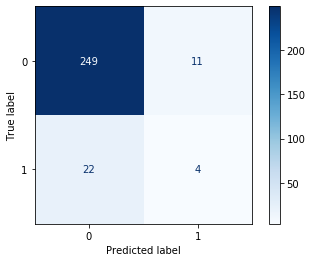

Confusion Matrix: Romance
Testing accuracy is 77.97
F1 test score is 37.62


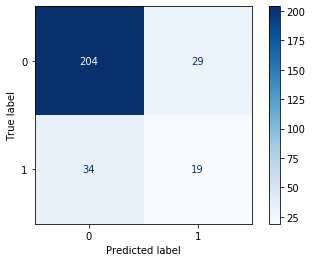

Confusion Matrix: Sci-Fi
Testing accuracy is 87.76
F1 test score is 49.28


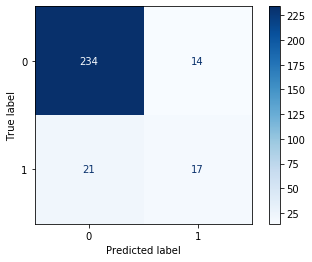

Confusion Matrix: Thriller
Testing accuracy is 72.03
F1 test score is 42.86


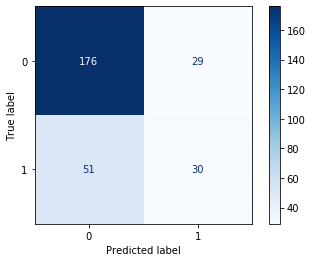

In [36]:
confusion_matrix_baseline(SVC_pipeline, tfidf_train_lem, y_train, tfidf_test_lem)

### Multinomial Naive Bayes Pipeline

In [37]:
%%time

# Define a pipeline combining a text feature extractor with multi label classifier
NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(alpha = .005, fit_prior = False)))])

print("Multinomial Naive Bayes Pipeline")
print("\n")

for category in categories:
    print('Processing {} scripts'.format(category))
    
    # Fitting Naive Bayes model on train data
    NB_pipeline.fit(tfidf_train_lem, y_train[category])
    
    # predict on test set
    NB_test_prediction = NB_pipeline.predict(tfidf_test_lem)
    NB_train_prediction = NB_pipeline.predict(tfidf_train_lem)
    
    # calculating test accuracy
    print('Testing accuracy is {}'.format(round(accuracy_score(y_train[category], NB_train_prediction) * 100,2)))
    print('F1 score is {}'.format(round(f1_score(y_train[category], NB_train_prediction) * 100, 2)))
    print("-----------------------")
    print('Testing accuracy is {}'.format(round(accuracy_score(y_test[category], NB_test_prediction) * 100,2)))
    print('F1 score is {}'.format(round(f1_score(y_test[category], NB_test_prediction) * 100,2)))
    print("\n")

Multinomial Naive Bayes Pipeline


Processing Action scripts
Testing accuracy is 95.91
F1 score is 92.47
-----------------------
Testing accuracy is 83.57
F1 score is 65.69


Processing Adventure scripts
Testing accuracy is 96.14
F1 score is 89.18
-----------------------
Testing accuracy is 87.76
F1 score is 56.79


Processing Comedy scripts
Testing accuracy is 94.04
F1 score is 90.91
-----------------------
Testing accuracy is 70.63
F1 score is 59.22


Processing Crime scripts
Testing accuracy is 95.79
F1 score is 89.6
-----------------------
Testing accuracy is 80.77
F1 score is 51.33


Processing Drama scripts
Testing accuracy is 94.62
F1 score is 94.9
-----------------------
Testing accuracy is 70.98
F1 score is 74.92


Processing Fantasy scripts
Testing accuracy is 97.89
F1 score is 89.89
-----------------------
Testing accuracy is 87.06
F1 score is 32.73


Processing Horror scripts
Testing accuracy is 98.25
F1 score is 93.83
-----------------------
Testing accuracy is 87.41
F1 sc

Confusion Matrix: Action
Testing accuracy is 83.57
F1 test score is 65.69


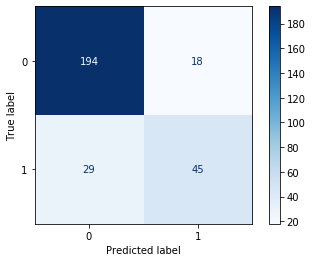

Confusion Matrix: Adventure
Testing accuracy is 87.76
F1 test score is 56.79


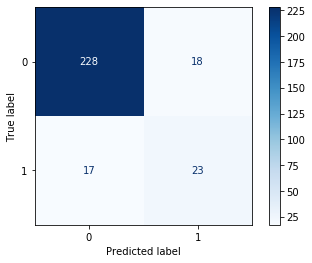

Confusion Matrix: Comedy
Testing accuracy is 70.63
F1 test score is 59.22


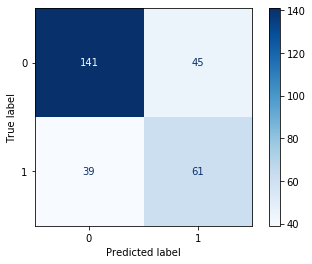

Confusion Matrix: Crime
Testing accuracy is 80.77
F1 test score is 51.33


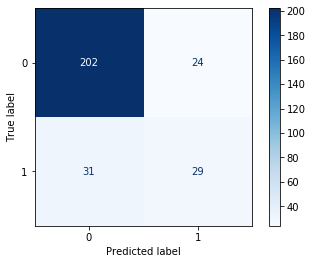

Confusion Matrix: Drama
Testing accuracy is 70.98
F1 test score is 74.92


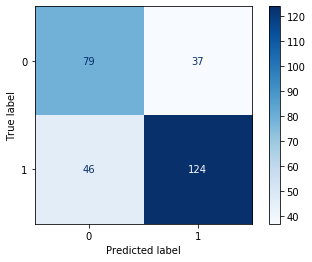

Confusion Matrix: Fantasy
Testing accuracy is 87.06
F1 test score is 32.73


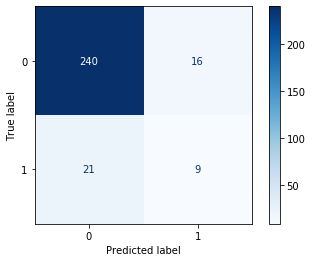

Confusion Matrix: Horror
Testing accuracy is 87.41
F1 test score is 50.0


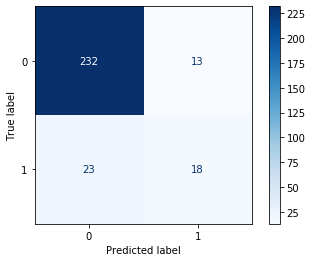

Confusion Matrix: Mystery
Testing accuracy is 88.11
F1 test score is 29.17


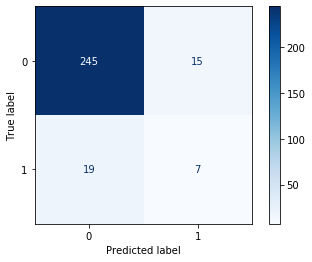

Confusion Matrix: Romance
Testing accuracy is 78.32
F1 test score is 40.38


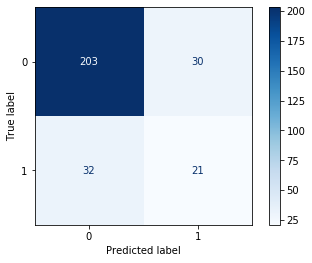

Confusion Matrix: Sci-Fi
Testing accuracy is 89.51
F1 test score is 59.46


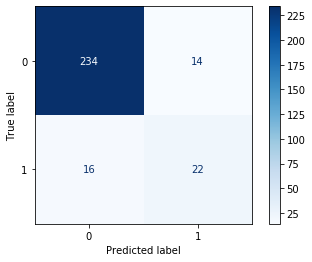

Confusion Matrix: Thriller
Testing accuracy is 72.03
F1 test score is 50.0


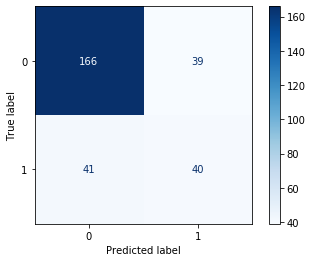

In [38]:
confusion_matrix_baseline(NB_pipeline, tfidf_train_lem, y_train, tfidf_test_lem)

In [69]:
NB_pipeline.fit(tfidf_train_lem, y_train['Thriller'])

Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=MultinomialNB(alpha=0.005,
                                                             fit_prior=False)))])

In [70]:
y_preds = NB_pipeline.predict(tfidf_test_lem[:5])

In [71]:
y_preds

array([1, 0, 1, 0, 0])

In [67]:
# y_preds > 0.5

In [72]:
print(y_test['Thriller'][:5])

1071    0
907     0
290     1
844     0
333     1
Name: Thriller, dtype: int64


In [38]:
y_pred_proba = NB_pipeline.predict_proba(tfidf_test_lem)

In [39]:
y_pred_proba

array([[3.02101686e-01, 6.97898314e-01],
       [8.33785204e-01, 1.66214796e-01],
       [3.76783772e-01, 6.23216228e-01],
       [5.74703125e-01, 4.25296875e-01],
       [8.70933594e-01, 1.29066406e-01],
       [8.87143757e-01, 1.12856243e-01],
       [8.84602587e-01, 1.15397413e-01],
       [8.66068248e-01, 1.33931752e-01],
       [8.43740328e-01, 1.56259672e-01],
       [3.64590423e-01, 6.35409577e-01],
       [9.98778439e-01, 1.22156102e-03],
       [8.26179381e-01, 1.73820619e-01],
       [6.52962584e-01, 3.47037416e-01],
       [4.91269502e-01, 5.08730498e-01],
       [9.63208926e-01, 3.67910743e-02],
       [1.10170906e-01, 8.89829094e-01],
       [8.83603470e-01, 1.16396530e-01],
       [9.99494557e-01, 5.05442605e-04],
       [2.20509842e-01, 7.79490158e-01],
       [4.58270032e-01, 5.41729968e-01],
       [6.36821695e-01, 3.63178305e-01],
       [9.09327263e-01, 9.06727374e-02],
       [7.79618824e-01, 2.20381176e-01],
       [5.08554929e-01, 4.91445071e-01],
       [8.908550

### Gaussian Naive Bayes

In [91]:
%%time

#Binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import hamming_loss

# initialize binary relevance multi-label classifier with a gaussian naive bayes base classifier
GNB = BinaryRelevance(GaussianNB())

#Fitting Naive Bayes model on train data
GNB.fit(tfidf_train_lem, y_train)
    
# # predict on test set
GNB_train_prediction = GNB.predict(tfidf_train_lem)
GNB_test_prediction = GNB.predict(tfidf_test_lem)


# calculating accuracy
print('Training accuracy is {}'.format(round(accuracy_score(y_train, GNB_train_prediction) *100, 2)))
print('F1 train score is {}'.format(round(f1_score(y_train, GNB_train_prediction, average="micro", zero_division='warn') *100, 2)))
print('Train Hamming loss: {}'.format(round(hamming_loss(y_train, GNB_train_prediction) *100, 2)))
print("-----------------------")
print('Testing accuracy is {}'.format(round(accuracy_score(y_test, GNB_test_prediction) *100, 2)))
print('F1 test score is {}'.format(round(f1_score(y_test, GNB_test_prediction, average="micro", zero_division='warn') *100, 2)))
print('Test Hamming loss: {}'.format(round(hamming_loss(y_test, GNB_test_prediction) *100, 2)))
print("\n")

Training accuracy is 99.3
F1 train score is 99.18
Train Hamming loss: 0.35
-----------------------
Testing accuracy is 10.49
F1 test score is 33.79
Test Hamming loss: 20.06


CPU times: user 54.3 s, sys: 45.8 s, total: 1min 40s
Wall time: 1min 40s


In [94]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, GNB_test_prediction)

array([[[212,   0],
        [ 73,   1]],

       [[246,   0],
        [ 40,   0]],

       [[186,   0],
        [ 99,   1]],

       [[226,   0],
        [ 60,   0]],

       [[ 41,  75],
        [ 13, 157]],

       [[256,   0],
        [ 30,   0]],

       [[245,   0],
        [ 41,   0]],

       [[260,   0],
        [ 26,   0]],

       [[232,   1],
        [ 53,   0]],

       [[247,   1],
        [ 36,   2]],

       [[203,   2],
        [ 81,   0]]])

### Classifier Chain

In [95]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time

# initialize classifier chains multi-label classifier
chain = ClassifierChain(LogisticRegression(solver='newton-cg', class_weight='balanced'))

# Training logistic regression model on train data
chain.fit(tfidf_train_lem, y_train)

# predict
chain_train_predictions = chain.predict(tfidf_train_lem)
chain_test_predictions = chain.predict(tfidf_test_lem)

# accuracy
print('Training accuracy is {}'.format(round(accuracy_score(y_train,chain_train_predictions) * 100, 2)))
print('F1 train score is {}'.format(round(f1_score(y_train, chain_train_predictions, average="micro") * 100, 2)))
print('Hamming train loss: {}'.format(round(hamming_loss(y_train, chain_train_predictions) * 100, 2)))
print("--------------------")
print('Testing accuracy is {}'.format(round(accuracy_score(y_test,chain_test_predictions) * 100, 2)))
print('F1 test score is {}'.format(round(f1_score(y_test, chain_test_predictions, average="micro") * 100, 2)))
print('Hamming test loss: {}'.format(round(hamming_loss(y_test, chain_test_predictions) * 100, 2)))
print("\n")

### Label Powerset

In [1]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [ ]:
%%time

# initialize label powerset multi-label classifier
powerset = LabelPowerset(LogisticRegression(solver='newton-cg', class_weight='balanced'))

# train
powerset.fit(tfidf_train_lem, y_train)

# predict
powerset_train_predictions = powerset.predict(tfidf_train_lem)
powerset_test_predictions = powerset.predict(tfidf_test_lem)

# accuracy
print('Training accuracy is {}'.format(round(accuracy_score(y_train,powerset_train_predictions) * 100, 2)))
print('F1 train score is {}'.format(round(f1_score(y_train, powerset_train_predictions, average="samples") * 100, 2)))
print('Hamming train loss: {}'.format(round(hamming_loss(y_train, powerset_train_predictions) * 100, 2)))
print("-----------------------")
print('Testing accuracy is {}'.format(round(accuracy_score(y_test,powerset_test_predictions) * 100, 2)))
print('F1 test score is {}'.format(round(f1_score(y_test, powerset_test_predictions, average="samples") * 100, 2)))
print('Hamming test loss: {}'.format(round(hamming_loss(y_test, powerset_test_predictions) * 100, 2)))
print("\n")

### Adapted Algorithm

In [180]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [183]:
# from skmultilearn.adapt import MLkNN

# mlknn_classifier = MLkNN(11)

# # train
# mlknn_classifier.fit(tfidf_train_lem, y_train)

# # predict
# mlknn_train_predictions = mlknn_classifier.predict(tfidf_train_lem)
# mlknn_test_predictions = mlknn_classifier.predict(tfidf_test_lem)

# # accuracy
# print('Training accuracy is {}'.format(round(accuracy_score(y_train, mlknn_train_predictions) * 100, 2)))
# print('F1 train score is {}'.format(round(f1_score(y_train, mlknn_train_predictions, average="samples") * 100, 2)))
# print('Hamming train loss: {}'.format(round(hamming_loss(y_train, mlknn_train_predictions) * 100, 2)))
# print("------------------")
# print('Testing accuracy is {}'.format(round(accuracy_score(y_test, mlknn_test_predictions) * 100, 2)))
# print('F1 test score is {}'.format(round(f1_score(y_test, mlknn_test_predictions, average="samples") * 100, 2)))
# print('Hamming test loss: {}'.format(round(hamming_loss(y_test, mlknn_test_predictions) * 100, 2)))
# print("\n")

In [48]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(1,9), 's': [0.5, 0.7, 1.0]}

clf = GridSearchCV(MLkNN(), parameters, scoring='f1_macro')
clf.fit(tfidf_train_lem, y_train)

print (clf.best_params_, clf.best_score_)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metric

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/pyt

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/pyt

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/pyt

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/pyt

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/pyt

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/pyt

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/pyt

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/ec2-user/anaconda3/envs/pyt

{'k': 1, 's': 0.5} 0.16028982455264137


In [185]:
# %%time

# classifier_new = MLkNN()

# # Note that this classifier can throw up errors when handling sparse matrices.

# x_train = lil_matrix(tfidf_test_lem).toarray()
# y_train = lil_matrix(y_train).toarray()
# x_test = lil_matrix(tfidf_test_lem).toarray()

# # train
# classifier_new.fit(x_train, y_train)

# # predict
# train_predictions_new = classifier_new.predict(x_train)
# test_predictions_new = classifier_new.predict(x_test)

# # accuracy
# print('Training accuracy is {}'.format(round(accuracy_score(y_train, train_predictions_new) * 100, 2)))
# print('F1 train score is {}'.format(round(f1_score(y_train, train_predictions_new, average="samples") * 100, 2)))
# print('Hamming train loss: {}'.format(round(hamming_loss(y_train, train_predictions_new) * 100, 2)))
# print("------------------")
# print('Testing accuracy is {}'.format(round(accuracy_score(y_test, test_predictions_new) * 100, 2)))
# print('F1 test score is {}'.format(round(f1_score(y_test, test_predictions_new, average="samples") * 100, 2)))
# print('Hamming test loss: {}'.format(round(hamming_loss(y_test, test_predictions_new) * 100, 2)))
# print("\n")